<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

# 1. Importing Packages

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import nltk
import re
import string
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
nltk.download('vader_lexicon')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramod\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ramod\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ramod\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramod\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ramod\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ramod\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# 2. Loading Data

In [4]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Classification-Sprint-2307FTDS-Team-JM4/notebook/kamogelo/train.csv?token=GHSAT0AAAAAACKPZ3NU7QARJAZZPKLXV6A6ZK673VA')
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [6]:
df_test = pd.read_csv('https://raw.githubusercontent.com/Classification-Sprint-2307FTDS-Team-JM4/notebook/kamogelo/test_with_no_labels.csv?token=GHSAT0AAAAAACKPZ3NVVX2RHBOJKWQ2KIBOZK6745Q')
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


# 3. Exploratory Data Analysis

In [7]:
df_test.describe()


,tweetid
count,10546.000000
mean,496899.936943
std,288115.677148
min,231.000000
25%,246162.500000
50%,495923.000000
75%,742250.000000
max,999983.000000


In [8]:
df_train.describe()


,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


*Null values*

In [18]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [17]:
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

In [19]:
df_train.shape

(15819, 3)

In [10]:
df_test.shape

(10546, 2)

# 4.DATA CLEANING

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [13]:
df_train_numeric = df_train.apply(pd.to_numeric, errors='coerce')
df_train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sentiment  15819 non-null  int64  
 1   message    0 non-null      float64
 2   tweetid    15819 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 370.9 KB


In [14]:
summary_statistics = df_train_numeric.describe()
df_train[summary_statistics].describe()

,sentiment,tweetid
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


PLOTING FEATURES

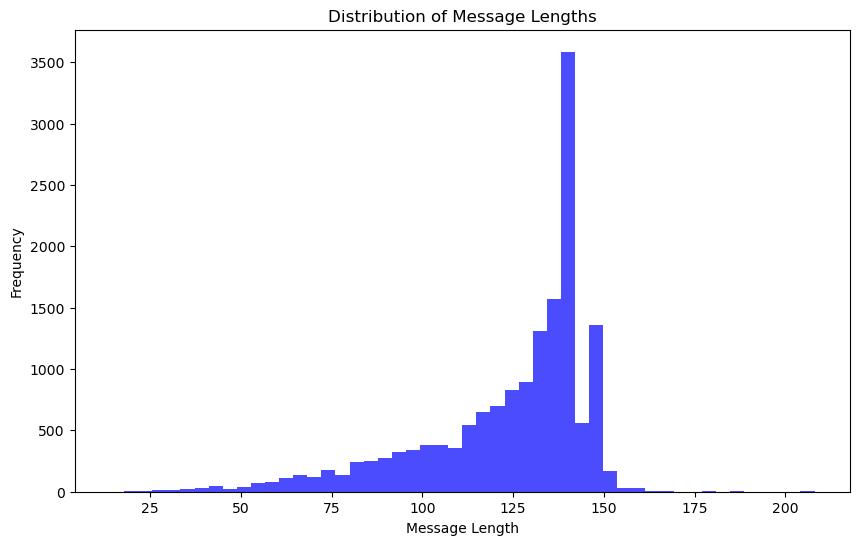

In [30]:

df_train['message_length'] = df_train['message'].apply(len)

# Plot histogram of message lengths
plt.figure(figsize=(10, 6))
plt.hist(df_train['message_length'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

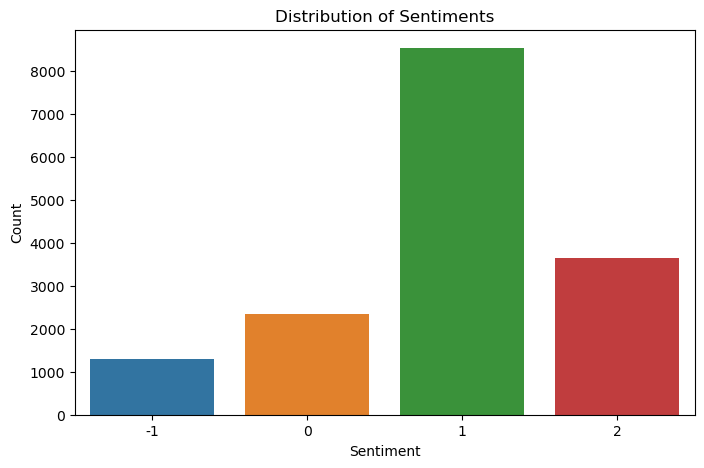

In [32]:
# Countplot of sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df_train)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# 5. Modelling

# 6. Model Perfomance

# 7. Model Explanation